# <u>Downloading Your Own Spotify Datasets</u>

## Introduction

There are many curated datasets related to songs, artists, and playlists listed on Spotify that you can find here:
* https://research.atspotify.com/datasets/
* https://www.kaggle.com/datasets?search=spotify

However, in this analysis we'd like the flexibility to create our own Spotify datasets. Using the **spotipy** package (which we will need to install) we will learn how to do the following things in this tutorial.

1. Download information about an **album** listed on Spotify.
2. Download information about an **artist** listed on Spotify.
3. Download audio information about a **song** listed on Spotify.
4. Download a **"pseudo-random" sample of songs** from a given **genre** and **release time period** listed on Spotify.

## 1. Spotify for Developers Dashboard Account Set Up

### 1.1. Spotify Account
To download Spotify datasets, you will need to have a Spotify account and then log in to your **Spotify for Developers Dashboard**.

If you already have a Spotify account, then you can go to this link, https://developer.spotify.com/dashboard/, and log in to your Spotify account.

If you don't have a Spotify account or would like to create a separate account to be used just for data analysis, you can go to that same link above, sign up for a new account, and then log into the dashboard.


### 1.2. Creating a Spotify App


Once you have logged in for the first time, you should click on the **CREATE AN APP** button. 

<div>
<img src="img/new_app.png" width="200"/>
</div>

After clicking on this, you should give your "app" a name and description. Then select **create**.

<div>
<img src="img/new_app2.png" width="200"/>
</div>

Then, click on this app that you just created. This should take you to your Spotify for Developers dashboard.

<div>
<img src="img/new_app3.png" width="600"/>
</div>


## 2. Downloading the Spotipy Python Package

Next, in your Anaconda command prompt, you should install the **spotipy** Python package by running the following command:

```pip install spotipy```

You can find more in-depth documentation on this package here: https://spotipy.readthedocs.io/en/2.19.0/.

## 3. Spotipy Imports

Next let's import all functions from the **spotipy** package.

In [1]:
import spotipy
import pandas as pd

## 4. Setting up Spotify for Developers Dashboard Authentication

Next, in order to extract data from the <a href="https://developer.spotify.com/documentation/web-api/">**Spotify Web API**</a> via the **spotipy** package, you need to look up your Spotify for Developers account credentials and use them to authenticate a call to the API.

### 4.1. Looking up Your Credentials

On your <a href="https://developer.spotify.com/dashboard/">Spotify dashboard</a>, you can find your **client id** and **client secret id** here.

<div>
<img src="img/new_app4.png" width="600"/>
</div>

### 4.2. Creating a Spotify SpotifyOAuth  Object

Next, let's create a **spotipy.client.Spotify** object which allows for you to make an authenticated call to your Spotify for Developers account. You should set the first two variables below to be the **client id** and the **client secret id** that you just looked up. (They should be string values like the rest of the objects below.)

In [2]:
SPOTIPY_CLIENT_ID = 'YOUR_CLIENT_ID_HERE'
SPOTIPY_CLIENT_SECRET = 'YOUR_SPOTIPY_CLIENT_SECRET_HERE'
PORT_NUMBER = 8080

client_credentials_manager = spotipy.SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

sp


What we have just created is a **spotipy.client.Spotify** object that we called **sp**. This **sp** object has various attributes and functions that will now allow us to download information from Spotify.

By using the **dir()** on this object (this dir() function works for all objects), we can see all of the available attributes and functions that correspond to this object. You can learn more about these attributes and methods in the **Spotipy documentaion** <a href="https://spotipy.readthedocs.io/en/master/#api-reference">here</a>, to see what kind of information they can grab. In this tutorial we will explore just 4 of these functions:
* **sp.artist_albums()**
* **sp.album_tracks()**
* **sp.audio_features()**
* **sp.search()**

In [3]:
dir(sp)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_append_device_id',
 '_auth',
 '_auth_headers',
 '_auth_manager',
 '_build_session',
 '_delete',
 '_get',
 '_get_id',
 '_get_uri',
 '_internal_call',
 '_is_uri',
 '_post',
 '_put',
 '_search_multiple_markets',
 '_session',
 'add_to_queue',
 'album',
 'album_tracks',
 'albums',
 'artist',
 'artist_albums',
 'artist_related_artists',
 'artist_top_tracks',
 'artists',
 'audio_analysis',
 'audio_features',
 'auth_manager',
 'available_markets',
 'backoff_factor',
 'categories',
 'category',
 'category_playlists',
 'client_credentials_manager',
 'country_codes',
 'current_playback',
 'current_user',
 'current_user

## 5. Extracting All Spotify <u>Albums</u> for a Given <u>Artist</u>

Each **artist** in Spotify has what's known as a **uri** which is in the form of: ```'spotify:artist:INPUT_ARTIST_ID_HERE'```.

### 5.1. Extract Spotify Album Information for The Beatles


If we wanted to find the artist URI for **The Beatles**, for instance, we could do a Google search for the terms 'The Beatles' and 'Spotify' to find the Spotify page url for The Beatles: https://open.spotify.com/artist/3WrFJ7ztbogyGnTHbHJFl2.

The id at the end of the url is the Spotify id for this artist. Therefore, the Spotify uri for The Beatles is the following:

```'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'```

In [4]:
artist_uri = 'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'

For a given **artist uri**, the function below will extract information about all of the albums that this artist has listed on Spotify.

In [5]:
def get_artist_album_info(artist_uri):
    results = sp.artist_albums(artist_uri, album_type='album')
    
    #STEP A: Extracting all of the album info for the given artist from the Spotify API
    #First 20 albums selected
    albums_dict=results['items']

    #If there's more than 20 total artist albums, adds that to the dictionary of albums for this artist
    while results['next']:
        results = sp.next(results)
        albums_dict.extend(results['items'])

    print('Total Albums Added to the Dictionary: ', len(albums_dict))
    print('Total Albums Spotify Claims this Artist Has: ', results['total'])
    #------------------------------
    #STEP B: Extracting some of this info in a dataframe
    all_artist_album_list=[]
    for album_dict in albums_dict:

        album_list=[]
        #1. Grabbing information about the album
        album_list.append(album_dict['uri'].split(':')[2])
        album_list.append(album_dict['name'])
        album_list.append(album_dict['release_date'])
        album_list.append(album_dict['total_tracks'])
        album_list.append(album_dict['available_markets'])


        #2. Grabbing information about the first listed album artist
        album_list.append(album_dict['artists'][0]['id'])
        album_list.append(album_dict['artists'][0]['name'])


        #3. Adding this album info to the album info list for the artist
        all_artist_album_list.append(album_list)


    df_artist_albums = pd.DataFrame(all_artist_album_list, columns=['album_id','album_name', 'release_date','total_tracks','available_markets','artist_uri','artist_name'])
    return df_artist_albums
    

Below we see that Spotify has 27 albums listed for The Beatles (as of 11/7/2022).

In [6]:
df_beatles_albums = get_artist_album_info(artist_uri)
df_beatles_albums

Total Albums Added to the Dictionary:  27
Total Albums Spotify Claims this Artist Has:  27


,album_id,album_name,release_date,total_tracks,available_markets,artist_uri,artist_name
0,7C221PnWhYGv8Tc0xSbfdc,Revolver (Super Deluxe),2022-10-28,63,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles
1,6emgUTDksZyhhWmtjM9FCs,Get Back (Rooftop Performance),2022-01-28,10,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles
2,1BdxbYp1FaNejpDgtDo25V,Let It Be (Super Deluxe),2021-10-15,57,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles
3,5iT3F2EhjVQVrO4PKhsP8c,Abbey Road (Super Deluxe Edition),2019-09-27,40,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles
4,1WMVvswNzB9i2UMh9svso5,The Beatles,2018-11-09,107,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles
5,0n9SWDBEftKwq09B01Pwzw,Live At The Hollywood Bowl,2016-09-09,17,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles
6,4KYcffwC5HgjJLdpQU9SjC,Let It Be... Naked (Remastered),2014-01-01,11,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles
7,0XRZpF083HqgygM0v1hQyE,Yellow Submarine Songtrack,2014-01-01,15,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles
8,4On0Hf7VJC1jz5gXY2cU8p,On Air - Live At The BBC (Vol.2),2013-11-11,63,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles
9,7vEJAtP3KgKSpOHVgwm3Eh,1 (Remastered),2000-11-13,27,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles


### 5.2. Try it Yourself!

Create a dataframe that is comprised of the album information for one of your favorite artists.

## 6. Extracting All <u>Songs</u> for a Given  <u>Album</u>

Each **album** on Spotify has what's known as a **uri** which is in the form of: ```'spotify:album:INPUT_ALBUM_ID_HERE'```.


### 6.1. Songs on the Album "Help!" by The Beatles
If we wanted to find the **album URI** for **Help! (Remastered)** by **The Beatles**, for instance, we could do a Google search for the terms 'The Beatles', 'Help!', and 'Spotify' to find the Spotify page url for The Beatles: https://open.spotify.com/album/0PT5m6hwPRrpBwIHVnvbFX

The id at the end of the url is the Spotify id for this album. 

Therefore, the Spotify uri for this album is the following:

```'spotify:album:0PT5m6hwPRrpBwIHVnvbFX'```

In [8]:
album_uri='spotify:album:0PT5m6hwPRrpBwIHVnvbFX'

For a given **album uri**, the function below will extract some information about all the songs that this **album** has listed on Spotify.

In [9]:
def get_album_songs_info(album_uri):
    results = sp.album_tracks(album_uri)
    
    #STEP A: Extracting the song info for the given album from the Spotify API
    #First 20 albums selected
    songs_dict=results['items']

    #If there's more than 20 total songs, adds that to the dictionary of songs for this album
    while results['next']:
        results = sp.next(results)
        songs_dict.extend(results['items'])

    print('Total Songs Added to the Dictionary: ', len(songs_dict))
    print('Total Songs Spotify Claims this Album Has: ', results['total'])
    #------------------------------
    #STEP B: Extracting some of this info in a dataframe
    all_songs_list=[]
    for song_dict in songs_dict:

        song_list=[]
        #1. Grabbing information about the song
        song_list.append(song_dict['uri'].split(':')[2])
        song_list.append(song_dict['name'])
        song_list.append(song_dict['duration_ms'])
        song_list.append(song_dict['explicit'])
        song_list.append(song_dict['is_local'])
        song_list.append(song_dict['disc_number'])
        song_list.append(song_dict['track_number'])


        #2. Grabbing information about the first listed song artist
        song_list.append(song_dict['artists'][0]['id'])
        song_list.append(song_dict['artists'][0]['name'])
        
        #3. Recording information about the album id
        song_list.append(album_uri.split(':')[2])
        
        


        #3. Adding this album info to the album info list for the artist
        all_songs_list.append(song_list)


    df_album_songs = pd.DataFrame(all_songs_list, columns=['track_id', 'track_name', 'duration_ms', 'explicit', 'is_local', 'disc_number', 'track_number','artist_id','artist_name', 'album_id'])
    return df_album_songs
    

For instance, we can see that The Beatles album **Help!** has 13 songs on it.

In [10]:
df_help = get_album_songs_info(album_uri)
df_help

Total Songs Added to the Dictionary:  14
Total Songs Spotify Claims this Album Has:  14


,track_id,track_name,duration_ms,explicit,is_local,disc_number,track_number,artist_id,artist_name,album_id
0,7DD7eSuYSC5xk2ArU62esN,Help! - Remastered 2009,139560,False,False,1,1,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,0PT5m6hwPRrpBwIHVnvbFX
1,5xcfepnz1v7a83T8An9gjw,The Night Before - Remastered 2009,154933,False,False,1,2,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,0PT5m6hwPRrpBwIHVnvbFX
2,4F1AgKpuFRMLEgtPETVwZk,You've Got To Hide Your Love Away - Remastered...,129120,False,False,1,3,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,0PT5m6hwPRrpBwIHVnvbFX
3,5EzvwjFwdP5Kfl5AZAemzu,I Need You - Remastered 2009,148786,False,False,1,4,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,0PT5m6hwPRrpBwIHVnvbFX
4,7hefVXaGsFPesbK6fKwS6F,Another Girl - Remastered 2009,125360,False,False,1,5,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,0PT5m6hwPRrpBwIHVnvbFX
5,70HNt0eoBVqr4ss68U8x3B,You're Going To Lose That Girl - Remastered 2009,138666,False,False,1,6,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,0PT5m6hwPRrpBwIHVnvbFX
6,7CZiDzGVjUssMSOXrDNYHL,Ticket To Ride - Remastered 2009,189680,False,False,1,7,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,0PT5m6hwPRrpBwIHVnvbFX
7,0IxxqsYBcCHEQ1HqLYJnwx,Act Naturally - Remastered 2009,150373,False,False,1,8,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,0PT5m6hwPRrpBwIHVnvbFX
8,2ue1KRstSKHF8jQkIJZiNC,It's Only Love - Remastered 2009,116480,False,False,1,9,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,0PT5m6hwPRrpBwIHVnvbFX
9,0y1LLH0NiwOD5tM3aNMXTr,You Like Me Too Much - Remastered 2009,156866,False,False,1,10,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,0PT5m6hwPRrpBwIHVnvbFX


Notice, how each track (ie. song) on the album has a unique **track_id**. For instance, the second track in the album, **The Night Before**, has the **track_id = 5xcfepnz1v7a83T8An9gjw**. You can look up more information about this track with the corresponding url: https://open.spotify.com/track/5xcfepnz1v7a83T8An9gjw.

Furthermore, each track on Spotify has a **track uri** with the form ```spotify:track:INPUT_TRACK_ID_HERE```

Thus, the track URI for **The Night Before** has the uri: ```spotify:track:5xcfepnz1v7a83T8An9gjw```.

### 6.2. Try it yourself!

Create a dataframe that is comprised of the song names of an album that you like.

## 7. Extracting <u>Audio Information</u> for a Given <u>Track</u>

Remember, each track on Spotify has a **track uri** with the form ```spotify:track:INPUT_TRACK_ID_HERE```

### 7.1. Extracting Audio Information for the Song 'The Night Before'

Let's learn more about the song **The Night Before**, by **The Beatles** which has the track uri: ```spotify:track:3BQHpFgAp4l80e1XslIjNI```.

This function below will return the audio information for a given **track uri**. You can read more in the documentation about what each of these audio features represent: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features.




In [12]:
def get_song_info(track_uri):
    #1. Extract the audio features of the track
    song_results = sp.audio_features(track_uri)
    
    #2. Collect the following audio information about the track
    song_list=[track_uri.split(':')[2],
               song_results[0]['danceability'],
               song_results[0]['energy'],
               song_results[0]['key'],
               song_results[0]['loudness'],
               song_results[0]['mode'],
               song_results[0]['speechiness'],
               song_results[0]['acousticness'],
               song_results[0]['instrumentalness'],
               song_results[0]['liveness'],
               song_results[0]['valence'],
               song_results[0]['tempo'],
               song_results[0]['type'],
               song_results[0]['time_signature']]
               
    
    df_song_audio=pd.DataFrame([song_list], columns=['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
                                                    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                                                    'tempo', 'type', 'time_signature'])
    return df_song_audio
    

In [13]:
track_uri='spotify:track:5xcfepnz1v7a83T8An9gjw'

In [14]:
df_nightbefore = get_song_info(track_uri)
df_nightbefore

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,time_signature
0,5xcfepnz1v7a83T8An9gjw,0.461,0.762,2,-6.727,1,0.0379,0.0537,0,0.238,0.632,84.496,audio_features,4


For instance, we can see that the the song  **The Night Before** is key of D (=2) and has relatively high energy (0.762 is somewhat close to 1).

### 7.2. Try it yourself!

Extract the audio information about a song that you like.

## 8. Extracting All <u>Track Audio Information</u> for a <u>Given Artist</u>

Let's say we would like to extract the track audio information for all songs by the **The Beatles** in albums on Spotify. 

### 8.1. Extracting All <u>Track uris</u> for a <u>Given Artist</u>

First let's extract <u>all track ids</u> found for <u>all albums</u> for **The Beatles** and put all this information into the same dataframe.

We'll go through each album id that we extracted in the df_beatles_albums dataframe, and concatenate the track id information for each song on each of these albums.

In [15]:
#Creating an empty dataframe with the same song column names
beatles_songs = pd.DataFrame(columns=['track_id', 'track_name', 'duration_ms', 'explicit', 'is_local', 'disc_number', 'track_number','artist_id','artist_name'])
display(beatles_songs)

#Cycle through each album id and extract all the track ids for the given album id
for album_id in df_beatles_albums['album_id']:
    print('Album id: ',album_id)
    new_album = get_album_songs_info('spotify:album:'+album_id)
    beatles_songs = pd.concat([beatles_songs, new_album])
    print('------------')
    
beatles_songs
    

,track_id,track_name,duration_ms,explicit,is_local,disc_number,track_number,artist_id,artist_name


Album id:  7C221PnWhYGv8Tc0xSbfdc
Total Songs Added to the Dictionary:  63
Total Songs Spotify Claims this Album Has:  63
------------
Album id:  6emgUTDksZyhhWmtjM9FCs
Total Songs Added to the Dictionary:  10
Total Songs Spotify Claims this Album Has:  10
------------
Album id:  1BdxbYp1FaNejpDgtDo25V
Total Songs Added to the Dictionary:  57
Total Songs Spotify Claims this Album Has:  57
------------
Album id:  5iT3F2EhjVQVrO4PKhsP8c
Total Songs Added to the Dictionary:  40
Total Songs Spotify Claims this Album Has:  40
------------
Album id:  1WMVvswNzB9i2UMh9svso5
Total Songs Added to the Dictionary:  107
Total Songs Spotify Claims this Album Has:  107
------------
Album id:  0n9SWDBEftKwq09B01Pwzw
Total Songs Added to the Dictionary:  17
Total Songs Spotify Claims this Album Has:  17
------------
Album id:  4KYcffwC5HgjJLdpQU9SjC
Total Songs Added to the Dictionary:  11
Total Songs Spotify Claims this Album Has:  11
------------
Album id:  0XRZpF083HqgygM0v1hQyE
Total Songs Added t

,track_id,track_name,duration_ms,explicit,is_local,disc_number,track_number,artist_id,artist_name,album_id
0,1u2yF3CsOvVOMP82AgP2gJ,Taxman - 2022 Mix,158266,False,False,1,1,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7C221PnWhYGv8Tc0xSbfdc
1,1Oo6F5Dn1s8hrUDUQuoCqB,Eleanor Rigby - 2022 Mix,126466,False,False,1,2,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7C221PnWhYGv8Tc0xSbfdc
2,7sNSyrCw3F7qnMpl938JUZ,I'm Only Sleeping - 2022 Mix,180320,False,False,1,3,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7C221PnWhYGv8Tc0xSbfdc
3,0NT88kD8fIXuwBOuXlPcmx,Love You To - 2022 Mix,179866,False,False,1,4,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7C221PnWhYGv8Tc0xSbfdc
4,47gNXRKcBJxu6bOvmyUroI,"Here, There And Everywhere - 2022 Mix",144906,False,False,1,5,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7C221PnWhYGv8Tc0xSbfdc
...,...,...,...,...,...,...,...,...,...,...
9,2VmB1rF9FtfKUmFHDVnq8Q,Baby It's You - Remastered 2009,160520,False,False,1,10,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,3KzAvEXcqJKBF97HrXwlgf
10,7Aobt67JnaF7qN8jCCKvHq,Do You Want To Know A Secret - Remastered 2009,117013,False,False,1,11,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,3KzAvEXcqJKBF97HrXwlgf
11,7fh53ta3vAOGJMQ4i5tCHe,A Taste Of Honey - Remastered 2009,123480,False,False,1,12,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,3KzAvEXcqJKBF97HrXwlgf
12,4dessGxnKXmTbHPhVgqODq,There's A Place - Remastered 2009,110493,False,False,1,13,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,3KzAvEXcqJKBF97HrXwlgf


It looks like **The Beatles** have 801 total tracks on albums listed on Spotify.

### 8.2. Extracting All <u>Track Audio Information</u> for a <u>Given Artist</u>

Finally, let's extract song audio information for all of the Beatle's songs.

We will cycle through each track id that we identified in the beatles_songs dataframe and get the corresponding audio information for that track id.

In [16]:
#Creates an empty dataframe with the columns that we want
song_audio_info = pd.DataFrame(columns=['track_id', 'tempo',
                                           'danceability', 'energy', 'key',
                                           'loudness', 'acousticness', 'instrumentalness',
                                           'liveness', 'valence'])


for track_id in beatles_songs['track_id']:
    #print(track_id)
    song_audio_info = pd.concat([song_audio_info, get_song_info('spotify:track:'+track_id)])
    
song_audio_info    

,track_id,tempo,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,mode,speechiness,type,time_signature
0,1u2yF3CsOvVOMP82AgP2gJ,133.603,0.484,0.771,7,-6.151,0.00225,0,0.7180,0.679,1.0,0.1300,audio_features,4.0
0,1Oo6F5Dn1s8hrUDUQuoCqB,137.891,0.606,0.304,0,-7.485,0.85300,0,0.3400,0.808,1.0,0.0414,audio_features,4.0
0,7sNSyrCw3F7qnMpl938JUZ,103.392,0.559,0.479,11,-7.890,0.09440,0,0.2690,0.658,1.0,0.0281,audio_features,4.0
0,0NT88kD8fIXuwBOuXlPcmx,124.210,0.460,0.600,5,-9.108,0.70600,0.000043,0.0630,0.679,1.0,0.0472,audio_features,4.0
0,47gNXRKcBJxu6bOvmyUroI,164.568,0.345,0.304,7,-9.477,0.87000,0.000031,0.1160,0.425,1.0,0.0297,audio_features,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2VmB1rF9FtfKUmFHDVnq8Q,112.421,0.608,0.494,4,-12.211,0.77800,0,0.0926,0.879,0.0,0.0345,audio_features,4.0
0,7Aobt67JnaF7qN8jCCKvHq,124.451,0.673,0.349,4,-12.414,0.60800,0,0.3800,0.609,1.0,0.0368,audio_features,4.0
0,7fh53ta3vAOGJMQ4i5tCHe,101.408,0.420,0.372,1,-11.416,0.69800,0,0.1040,0.412,0.0,0.0327,audio_features,3.0
0,4dessGxnKXmTbHPhVgqODq,140.928,0.455,0.582,4,-10.009,0.62900,0.000004,0.1720,0.927,1.0,0.0292,audio_features,4.0


### 8.3. Curating all Song, Album, and Artist Information that we Have

The primary key for this resulting dataframe above is just the **track_id**, but unfortunately this function is not able to tell you more qualitative things about the track like: the name of the song, the name/id of the artist, name/id of the album that the track is on. 

Let's merge the following two dataframes on the **track_id**:
* **song_audio_info**: has the audio information of all beatles songs
* **beatles_songs**: has the track id as well as the artist/album ids.

In [17]:
df_beatles_songs = pd.merge(beatles_songs, song_audio_info, on =['track_id'])
df_beatles_songs

,track_id,track_name,duration_ms,explicit,is_local,disc_number,track_number,artist_id,artist_name,album_id,...,key,loudness,acousticness,instrumentalness,liveness,valence,mode,speechiness,type,time_signature
0,1u2yF3CsOvVOMP82AgP2gJ,Taxman - 2022 Mix,158266,False,False,1,1,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7C221PnWhYGv8Tc0xSbfdc,...,7,-6.151,0.00225,0,0.7180,0.679,1.0,0.1300,audio_features,4.0
1,1Oo6F5Dn1s8hrUDUQuoCqB,Eleanor Rigby - 2022 Mix,126466,False,False,1,2,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7C221PnWhYGv8Tc0xSbfdc,...,0,-7.485,0.85300,0,0.3400,0.808,1.0,0.0414,audio_features,4.0
2,7sNSyrCw3F7qnMpl938JUZ,I'm Only Sleeping - 2022 Mix,180320,False,False,1,3,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7C221PnWhYGv8Tc0xSbfdc,...,11,-7.890,0.09440,0,0.2690,0.658,1.0,0.0281,audio_features,4.0
3,0NT88kD8fIXuwBOuXlPcmx,Love You To - 2022 Mix,179866,False,False,1,4,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7C221PnWhYGv8Tc0xSbfdc,...,5,-9.108,0.70600,0.000043,0.0630,0.679,1.0,0.0472,audio_features,4.0
4,47gNXRKcBJxu6bOvmyUroI,"Here, There And Everywhere - 2022 Mix",144906,False,False,1,5,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7C221PnWhYGv8Tc0xSbfdc,...,7,-9.477,0.87000,0.000031,0.1160,0.425,1.0,0.0297,audio_features,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2VmB1rF9FtfKUmFHDVnq8Q,Baby It's You - Remastered 2009,160520,False,False,1,10,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,3KzAvEXcqJKBF97HrXwlgf,...,4,-12.211,0.77800,0,0.0926,0.879,0.0,0.0345,audio_features,4.0
797,7Aobt67JnaF7qN8jCCKvHq,Do You Want To Know A Secret - Remastered 2009,117013,False,False,1,11,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,3KzAvEXcqJKBF97HrXwlgf,...,4,-12.414,0.60800,0,0.3800,0.609,1.0,0.0368,audio_features,4.0
798,7fh53ta3vAOGJMQ4i5tCHe,A Taste Of Honey - Remastered 2009,123480,False,False,1,12,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,3KzAvEXcqJKBF97HrXwlgf,...,1,-11.416,0.69800,0,0.1040,0.412,0.0,0.0327,audio_features,3.0
799,4dessGxnKXmTbHPhVgqODq,There's A Place - Remastered 2009,110493,False,False,1,13,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,3KzAvEXcqJKBF97HrXwlgf,...,4,-10.009,0.62900,0.000004,0.1720,0.927,1.0,0.0292,audio_features,4.0


Let's finally also merge this resulting dataframe with **df_beatles_albums** which has more information about the corresponding album that each track was on (like release_date, total tracks on the album etc.)

In [18]:
df = pd.merge(df_beatles_albums, df_beatles_songs, on=['album_id', 'artist_name'])
df

,album_id,album_name,release_date,total_tracks,available_markets,artist_uri,artist_name,track_id,track_name,duration_ms,...,key,loudness,acousticness,instrumentalness,liveness,valence,mode,speechiness,type,time_signature
0,7C221PnWhYGv8Tc0xSbfdc,Revolver (Super Deluxe),2022-10-28,63,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles,1u2yF3CsOvVOMP82AgP2gJ,Taxman - 2022 Mix,158266,...,7,-6.151,0.00225,0,0.7180,0.679,1.0,0.1300,audio_features,4.0
1,7C221PnWhYGv8Tc0xSbfdc,Revolver (Super Deluxe),2022-10-28,63,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles,1Oo6F5Dn1s8hrUDUQuoCqB,Eleanor Rigby - 2022 Mix,126466,...,0,-7.485,0.85300,0,0.3400,0.808,1.0,0.0414,audio_features,4.0
2,7C221PnWhYGv8Tc0xSbfdc,Revolver (Super Deluxe),2022-10-28,63,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7sNSyrCw3F7qnMpl938JUZ,I'm Only Sleeping - 2022 Mix,180320,...,11,-7.890,0.09440,0,0.2690,0.658,1.0,0.0281,audio_features,4.0
3,7C221PnWhYGv8Tc0xSbfdc,Revolver (Super Deluxe),2022-10-28,63,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles,0NT88kD8fIXuwBOuXlPcmx,Love You To - 2022 Mix,179866,...,5,-9.108,0.70600,0.000043,0.0630,0.679,1.0,0.0472,audio_features,4.0
4,7C221PnWhYGv8Tc0xSbfdc,Revolver (Super Deluxe),2022-10-28,63,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles,47gNXRKcBJxu6bOvmyUroI,"Here, There And Everywhere - 2022 Mix",144906,...,7,-9.477,0.87000,0.000031,0.1160,0.425,1.0,0.0297,audio_features,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,3KzAvEXcqJKBF97HrXwlgf,Please Please Me (Remastered),1963-03-22,14,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles,2VmB1rF9FtfKUmFHDVnq8Q,Baby It's You - Remastered 2009,160520,...,4,-12.211,0.77800,0,0.0926,0.879,0.0,0.0345,audio_features,4.0
773,3KzAvEXcqJKBF97HrXwlgf,Please Please Me (Remastered),1963-03-22,14,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7Aobt67JnaF7qN8jCCKvHq,Do You Want To Know A Secret - Remastered 2009,117013,...,4,-12.414,0.60800,0,0.3800,0.609,1.0,0.0368,audio_features,4.0
774,3KzAvEXcqJKBF97HrXwlgf,Please Please Me (Remastered),1963-03-22,14,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles,7fh53ta3vAOGJMQ4i5tCHe,A Taste Of Honey - Remastered 2009,123480,...,1,-11.416,0.69800,0,0.1040,0.412,0.0,0.0327,audio_features,3.0
775,3KzAvEXcqJKBF97HrXwlgf,Please Please Me (Remastered),1963-03-22,14,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",3WrFJ7ztbogyGnTHbHJFl2,The Beatles,4dessGxnKXmTbHPhVgqODq,There's A Place - Remastered 2009,110493,...,4,-10.009,0.62900,0.000004,0.1720,0.927,1.0,0.0292,audio_features,4.0


## 9. Exploring the Song Data for a Given Artist

In [19]:
df.corr()

,total_tracks,tempo,danceability,energy,loudness,acousticness,liveness,valence,mode,speechiness,time_signature
total_tracks,1.000000,-0.085629,0.092220,-0.239717,-0.309262,0.245210,0.006349,-0.035173,0.021737,0.111162,-0.018252
tempo,-0.085629,1.000000,-0.084964,0.118188,0.118799,0.001062,-0.083029,0.114491,0.022257,-0.004826,0.099211
danceability,0.092220,-0.084964,1.000000,-0.097767,-0.119250,0.085421,-0.174454,0.338076,0.014735,0.149751,0.180375
energy,-0.239717,0.118188,-0.097767,1.000000,0.699673,-0.595641,0.277875,0.393418,0.042610,-0.219223,0.159190
loudness,-0.309262,0.118799,-0.119250,0.699673,1.000000,-0.507793,0.076764,0.214957,0.034145,-0.518104,0.122052
acousticness,0.245210,0.001062,0.085421,-0.595641,-0.507793,1.000000,-0.128716,-0.173742,0.013791,0.233909,-0.114226
liveness,0.006349,-0.083029,-0.174454,0.277875,0.076764,-0.128716,1.000000,0.021450,-0.000191,0.102276,0.023112
valence,-0.035173,0.114491,0.338076,0.393418,0.214957,-0.173742,0.021450,1.000000,0.051988,0.007799,0.192560
mode,0.021737,0.022257,0.014735,0.042610,0.034145,0.013791,-0.000191,0.051988,1.000000,-0.139408,0.044508
speechiness,0.111162,-0.004826,0.149751,-0.219223,-0.518104,0.233909,0.102276,0.007799,-0.139408,1.000000,-0.024688


<AxesSubplot:>

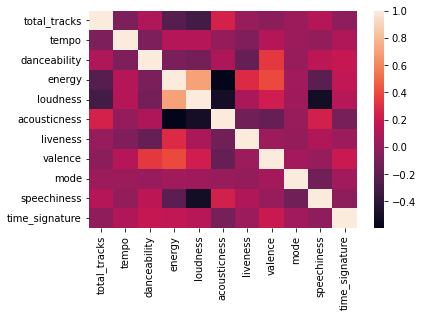

In [20]:
import seaborn as sns
sns.heatmap(df.corr())

When it comes to **Beatles** songs, it would appear that the two audio features that have the highest correlation magnitude are loudness and energy.

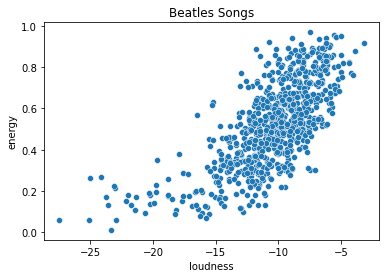

In [21]:
import matplotlib.pyplot as plt
sns.scatterplot(x='loudness', y='energy', data=df)
plt.title('Beatles Songs')
plt.show()

## 10. Song Data for a Random Sample of Songs from a Given Genre

### 10.1 Pseudo-Random Samples of Songs from Spotify
Finally, while the Spotify API does not have any built in functions to allow for you to collect a **true** random sample of songs from a given genre, there exist many "hacks" in which you can attempt to generate a "pseudo-random" sample of songs for a given genre.

The function below can select a pseudo-random sample of Spotify tracks (sample size limit is 900) for a given **genre** and **year range**. You also need to specify a random state for the random sample.

A list of Spotify genre names can be found here (case sensitive names): https://gist.github.com/andytlr/4104c667a62d8145aa3a.

In [22]:
def get_random_songs(number_of_songs=1, genre='Pop', year_range='2011-2022', random_state = 101):
    #Set random seed
    import random
    random.seed(random_state)

    #Generate random offsets (sampling without replacement)
    random_offset = random.sample(range(0, 900), number_of_songs)

    #Generate random search character for query (sampling with replacement)
    chars = 'abcdefghijklmnopqrstuvwxyz'
    random_char = random.choices(chars, k=number_of_songs)

    #Generate random id to select in the output list of 10 (sampling with replacement)
    random_id = random.choices(range(0, 10), k=number_of_songs)

    df_random_songs = pd.DataFrame(columns=['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id', 'album_name', 'release_date'])

    for i in range(0,number_of_songs):
        #Pseudo-random query selection
        results = sp.search(q='genre:' + genre + ' year:' + year_range+' '+random_char[i], type='track', offset=random_offset[i])

        song_list = []
        #Adding track info
        song_list.append(results['tracks']['items'][random_id[i]]['id'])
        song_list.append(results['tracks']['items'][random_id[i]]['name'])

        #Adding artist info (first one listed)
        song_list.append(results['tracks']['items'][random_id[i]]['artists'][0]['id'])
        song_list.append(results['tracks']['items'][random_id[i]]['artists'][0]['name'])

        #Adding album info
        song_list.append(results['tracks']['items'][random_id[i]]['album']['id'])
        song_list.append(results['tracks']['items'][random_id[i]]['album']['name'])
        song_list.append(results['tracks']['items'][random_id[i]]['album']['release_date'])

        df_song = pd.DataFrame([song_list], columns=['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id', 'album_name', 'release_date'])

        df_random_songs=pd.concat([df_random_songs, df_song])

    df_random_songs=df_random_songs.reset_index(drop=True)
    
    return df_random_songs    
    

For instance, the **get_random_songs()** function below collects a pseudo-random sample of 10 Pop songs that were released between the years of 2011-2022. We use a random state of 100.

In [23]:
df = get_random_songs(number_of_songs=10, genre='Pop', year_range='2011-2022', random_state = 100)
df

,track_id,track_name,artist_id,artist_name,album_id,album_name,release_date
0,0t7fVeEJxO2Xi4H2K5Svc9,Send My Love (To Your New Lover),4dpARuHxo51G3z768sgnrY,Adele,3AvPX1B1HiFROvYjLb5Qwi,25,2015-11-20
1,1BPBwKueIEMnUcbbs2te7B,NUMB,0OEYE03fBF2VoTBxGuaUxL,Chri$tian Gate$,5KVfexccg4jLnnmbHfJZn0,NUMB,2021-06-04
2,0PDUDa38GO8lMxLCRc4lL1,PILLOWTALK,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,5amj9zNeZ3B2EdpBgXrOZ0,Mind Of Mine (Deluxe Edition),2016-03-25
3,58g9aqJPu1WsEtTSrxInM2,If You Really Love Me (How Will I Know),1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,6SVOkuwLfuU8Izw8Rsz6Ql,This Is Hits 20s,2022-11-04
4,26kVXR9aQXzDiKggPGnUQR,What If I Love You,1KGcdM5KxCVydaHe29QAj9,Gatlin,7cf0JlwRmn6rEcKlxhj4za,What If I Love You,2021-04-08
5,2pyjbGTpJCPjMYwCbdymiF,Dazed & Confused,5xkAtLTf309LAGZTbvULBn,Ruel,4FFdoMdORifF6Qt3ymDMB8,Dazed & Confused,2018-04-27
6,7b1NUJTJq9xgg8JiVe0hd6,MOVE (feat. Grace Jones & Tems),6vWDO969PvNqNYHIOW5v0m,Beyoncé,3ctW8o8ABBCNWWkdIvEGgV,RENAISSANCE,2022-07-29
7,608a1wIsSd5KzMEqm1O7w3,I'm On One,0QHgL1lAIqAw0HtD7YldmP,DJ Khaled,7FyxsUO4kVqRfo2ne1aUOg,We The Best Forever,2011-01-01
8,6u3CPnFMKANYgfdiifFOiJ,"Gravity (feat. Tyler, The Creator)",3tlXnStJ1fFhdScmQeLpuG,Brent Faiyaz,6ymw9w3tGhxVGBskQAhsvm,"Gravity (feat. Tyler, The Creator)",2021-01-29
9,6QlPi87careHuObNILJJ9D,The Business,2o5jDhtHVPhrJdv3cEQ99Z,Tiësto,2KoskMghrEQYpUpU3SAoa8,House Floorfillers,2022-10-28


### 10.2 Audio Information of Pseudo-Random Samples

Finally, let's get the audio information for each of these track ids that we found in our pseudo-random sample.

In [24]:
#Creates an empty dataframe with the columns that we want
song_audio_info = pd.DataFrame(columns=['track_id', 'tempo',
                                           'danceability', 'energy', 'key',
                                           'loudness', 'acousticness', 'instrumentalness',
                                           'liveness', 'valence'])


for track_id in df['track_id']:
    #print(track_id)
    song_audio_info = pd.concat([song_audio_info, get_song_info('spotify:track:'+track_id)])
    
song_audio_info   

,track_id,tempo,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,mode,speechiness,type,time_signature
0,0t7fVeEJxO2Xi4H2K5Svc9,164.069,0.688,0.533,6,-8.363,0.0355,0.000003,0.1720,0.567,0.0,0.0865,audio_features,4.0
0,1BPBwKueIEMnUcbbs2te7B,103.791,0.682,0.598,8,-5.694,0.0575,0.000000,0.2990,0.823,1.0,0.2640,audio_features,4.0
0,0PDUDa38GO8lMxLCRc4lL1,124.944,0.584,0.700,11,-4.275,0.1170,0.000000,0.0939,0.438,1.0,0.0456,audio_features,4.0
0,58g9aqJPu1WsEtTSrxInM2,122.984,0.692,0.883,7,-4.698,0.0512,0.000000,0.2280,0.614,1.0,0.0582,audio_features,4.0
0,26kVXR9aQXzDiKggPGnUQR,101.002,0.743,0.666,11,-8.337,0.4320,0.000018,0.1290,0.492,1.0,0.0546,audio_features,4.0
0,2pyjbGTpJCPjMYwCbdymiF,127.906,0.688,0.500,2,-7.411,0.1020,0.000000,0.3550,0.418,1.0,0.1380,audio_features,3.0
0,7b1NUJTJq9xgg8JiVe0hd6,118.028,0.876,0.628,1,-6.595,0.0165,0.033900,0.0938,0.809,1.0,0.0935,audio_features,4.0
0,608a1wIsSd5KzMEqm1O7w3,149.330,0.413,0.807,11,-3.499,0.0536,0.000000,0.6310,0.438,0.0,0.3180,audio_features,4.0
0,6u3CPnFMKANYgfdiifFOiJ,163.924,0.539,0.615,1,-8.746,0.1730,0.005600,0.1440,0.493,0.0,0.2520,audio_features,4.0
0,6QlPi87careHuObNILJJ9D,120.031,0.798,0.620,8,-7.079,0.4140,0.019200,0.1120,0.235,0.0,0.2320,audio_features,4.0


In [25]:
df= pd.merge(df,song_audio_info, on=['track_id'])
df

,track_id,track_name,artist_id,artist_name,album_id,album_name,release_date,tempo,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,mode,speechiness,type,time_signature
0,0t7fVeEJxO2Xi4H2K5Svc9,Send My Love (To Your New Lover),4dpARuHxo51G3z768sgnrY,Adele,3AvPX1B1HiFROvYjLb5Qwi,25,2015-11-20,164.069,0.688,0.533,6,-8.363,0.0355,0.000003,0.1720,0.567,0.0,0.0865,audio_features,4.0
1,1BPBwKueIEMnUcbbs2te7B,NUMB,0OEYE03fBF2VoTBxGuaUxL,Chri$tian Gate$,5KVfexccg4jLnnmbHfJZn0,NUMB,2021-06-04,103.791,0.682,0.598,8,-5.694,0.0575,0.000000,0.2990,0.823,1.0,0.2640,audio_features,4.0
2,0PDUDa38GO8lMxLCRc4lL1,PILLOWTALK,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,5amj9zNeZ3B2EdpBgXrOZ0,Mind Of Mine (Deluxe Edition),2016-03-25,124.944,0.584,0.700,11,-4.275,0.1170,0.000000,0.0939,0.438,1.0,0.0456,audio_features,4.0
3,58g9aqJPu1WsEtTSrxInM2,If You Really Love Me (How Will I Know),1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,6SVOkuwLfuU8Izw8Rsz6Ql,This Is Hits 20s,2022-11-04,122.984,0.692,0.883,7,-4.698,0.0512,0.000000,0.2280,0.614,1.0,0.0582,audio_features,4.0
4,26kVXR9aQXzDiKggPGnUQR,What If I Love You,1KGcdM5KxCVydaHe29QAj9,Gatlin,7cf0JlwRmn6rEcKlxhj4za,What If I Love You,2021-04-08,101.002,0.743,0.666,11,-8.337,0.4320,0.000018,0.1290,0.492,1.0,0.0546,audio_features,4.0
5,2pyjbGTpJCPjMYwCbdymiF,Dazed & Confused,5xkAtLTf309LAGZTbvULBn,Ruel,4FFdoMdORifF6Qt3ymDMB8,Dazed & Confused,2018-04-27,127.906,0.688,0.500,2,-7.411,0.1020,0.000000,0.3550,0.418,1.0,0.1380,audio_features,3.0
6,7b1NUJTJq9xgg8JiVe0hd6,MOVE (feat. Grace Jones & Tems),6vWDO969PvNqNYHIOW5v0m,Beyoncé,3ctW8o8ABBCNWWkdIvEGgV,RENAISSANCE,2022-07-29,118.028,0.876,0.628,1,-6.595,0.0165,0.033900,0.0938,0.809,1.0,0.0935,audio_features,4.0
7,608a1wIsSd5KzMEqm1O7w3,I'm On One,0QHgL1lAIqAw0HtD7YldmP,DJ Khaled,7FyxsUO4kVqRfo2ne1aUOg,We The Best Forever,2011-01-01,149.330,0.413,0.807,11,-3.499,0.0536,0.000000,0.6310,0.438,0.0,0.3180,audio_features,4.0
8,6u3CPnFMKANYgfdiifFOiJ,"Gravity (feat. Tyler, The Creator)",3tlXnStJ1fFhdScmQeLpuG,Brent Faiyaz,6ymw9w3tGhxVGBskQAhsvm,"Gravity (feat. Tyler, The Creator)",2021-01-29,163.924,0.539,0.615,1,-8.746,0.1730,0.005600,0.1440,0.493,0.0,0.2520,audio_features,4.0
9,6QlPi87careHuObNILJJ9D,The Business,2o5jDhtHVPhrJdv3cEQ99Z,Tiësto,2KoskMghrEQYpUpU3SAoa8,House Floorfillers,2022-10-28,120.031,0.798,0.620,8,-7.079,0.4140,0.019200,0.1120,0.235,0.0,0.2320,audio_features,4.0
